# 지연사유별 시각화

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 한글 깨짐 방지
mpl.rcParams['font.family'].insert(0, 'Malgun Gothic')

#### 데이터 적재

In [3]:
# 한국공항공사 데이터로 확인한 지연통계자료(월별)
df_delay = pd.read_csv('df_delay_stat.csv')
df_delay

,공항명,운항(횟수),기상,A/C접속,A/C정비,여객처리,복합원인,기타,계,year,month
0,김포,10317,3,1188,19,7,0,123,1340,17,1
1,김해,4045,2,435,6,1,0,44,488,17,1
2,제주,12573,13,1841,16,2,0,33,1905,17,1
3,대구,1058,0,106,2,0,0,1,109,17,1
4,광주,935,2,96,2,0,0,2,102,17,1
5,무안,62,0,0,0,0,0,4,4,17,1
6,청주,1042,7,122,2,1,0,13,145,17,1
7,여수,412,0,40,0,0,0,0,40,17,1
8,울산,432,1,33,0,0,0,3,37,17,1
9,사천,158,0,19,0,0,0,0,19,17,1


In [4]:
afsnt = pd.read_csv('AFSNT2.csv', encoding='CP949', engine='python')
afsnt.head()

,SDT_YY,SDT_MM,SDT_DD,SDT_DY,ARP,ODP,FLO,FLT,REG,AOD,IRR,STT,ATT,DLY,DRR,CNL,CNR
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [5]:
# 지연사유 보기 편하게 mapping
afsnt.DRR = afsnt.DRR.map({'A01':'안개','A02':'강설','A03':'강우','A04':'태풍','A05':'강풍','A06':'상층풍',
                           'A07':'운고','A08':'기상-황사','A09':'기상-항로','A10':'기상-뇌우','A99':'기상-기타',
                           'B01':'계류장혼잡','B02':'사고','B03':'활주로사정','B04':'행사',
                           'B05':'항행시설고장', 'B06':'공항폐쇄','B07':'이륙대기','B08':'Curfew',
                           'C01':'A/C정비','C02':'A/C접속','C03':'승객접속','C04':'여객처리','C05':'지상조업',
                          'C06':'SKD변경','C07':'항공기부족','C08':'연료재급유','C09':'환자','C10':'제방빙작업',
                          'C11':'보안검색','C12':'조종사자격','C13':'승무원휴식','C14':'승무원연결','C15':'화물탑재',
                          'C16':'화물연결','C17':'화물수요부족','D01':'항로혼잡','D02':'영공통과불허','D03':'관계',
                          'Z01':'복합원인','Z99':'기타'})

In [6]:
# column명 임의 변환
afsnt.columns = ['year','month','day','weekday','origin','dest','airline','flight','tailnum','is_arrive',
                 'is_regular','sched_time','real_time','is_delay','cause_delay','is_cancel','cause_cancel']

In [7]:
afsnt.head()

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,is_regular,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,N,10:05,10:32,N,NaN,N,NaN
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,A/C접속,N,NaN
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN


In [8]:
# 날짜변수(우헌 전처리 코드 참고)
afsnt["date"] = pd.to_datetime(afsnt[["year", "month", "day"]])
afsnt["sched_datetime"] = pd.to_datetime(afsnt['date'].astype(str) + " " + afsnt["sched_time"].astype(str))
afsnt["real_datetime"] = pd.to_datetime(afsnt['date'].astype(str) + " " + afsnt["real_time"].astype(str))
# delay 변수 생성
temp = afsnt["real_datetime"] - afsnt["sched_datetime"] 
temp = pd.DataFrame(temp.dt.components)
afsnt["delay"] = temp['minutes'] + 60 * temp['hours'] + 1440 * temp['days']

afsnt.head()

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,10:05,10:32,N,NaN,N,NaN,2017-01-01,2017-01-01 10:05:00,2017-01-01 10:32:00,27
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,9:30,9:31,N,NaN,N,NaN,2017-01-01,2017-01-01 09:30:00,2017-01-01 09:31:00,1
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,12:45,13:03,N,NaN,N,NaN,2017-01-01,2017-01-01 12:45:00,2017-01-01 13:03:00,18
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,...,13:25,14:09,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 13:25:00,2017-01-01 14:09:00,44
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,...,16:10,16:31,N,NaN,N,NaN,2017-01-01,2017-01-01 16:10:00,2017-01-01 16:31:00,21


In [13]:
afsnt[afsnt.date=='2019-01']

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
793437,2019,1,1,화,ARP3,ARP6,J,J1954,SEw3NTY4,A,...,9:05,9:04,N,NaN,N,NaN,2019-01-01,2019-01-01 09:05:00,2019-01-01 09:04:00,-1
793438,2019,1,1,화,ARP3,ARP6,J,J1955,SEw3NTY4,D,...,9:45,10:04,N,NaN,N,NaN,2019-01-01,2019-01-01 09:45:00,2019-01-01 10:04:00,19
793439,2019,1,1,화,ARP3,ARP6,J,J1956,SEw3NTY4,A,...,12:45,12:32,N,NaN,N,NaN,2019-01-01,2019-01-01 12:45:00,2019-01-01 12:32:00,-13
793440,2019,1,1,화,ARP3,ARP6,J,J1958,SEw3NTY4,A,...,16:15,16:12,N,NaN,N,NaN,2019-01-01,2019-01-01 16:15:00,2019-01-01 16:12:00,-3
793441,2019,1,1,화,ARP3,ARP6,J,J1959,SEw3NTY4,D,...,16:55,17:12,N,NaN,N,NaN,2019-01-01,2019-01-01 16:55:00,2019-01-01 17:12:00,17
793442,2019,1,1,화,ARP3,ARP6,J,J1960,SEw3NTY4,A,...,19:45,19:57,N,NaN,N,NaN,2019-01-01,2019-01-01 19:45:00,2019-01-01 19:57:00,12
793443,2019,1,1,화,ARP3,ARP6,J,J1961,SEw3NTY4,D,...,20:25,20:51,N,NaN,N,NaN,2019-01-01,2019-01-01 20:25:00,2019-01-01 20:51:00,26
793444,2019,1,1,화,ARP3,ARP6,J,J1957,SEw3NTY4,D,...,13:25,13:42,N,NaN,N,NaN,2019-01-01,2019-01-01 13:25:00,2019-01-01 13:42:00,17
793445,2019,1,1,화,ARP2,ARP3,J,J1004,SEw3MjAw,D,...,6:55,7:11,N,NaN,N,NaN,2019-01-01,2019-01-01 06:55:00,2019-01-01 07:11:00,16
793446,2019,1,1,화,ARP13,ARP3,J,J1921,NaN,A,...,14:00,0:00,N,NaN,Y,A02,2019-01-01,2019-01-01 14:00:00,2019-01-01 00:00:00,-840


### 지연된건데 잘못계산된 data
- delay 변수 다시 생성해야 함.

In [9]:
afsnt[(afsnt.delay<=30)&(afsnt.is_delay=='Y')]

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
400324,2018,1,11,목,ARP1,ARP3,J,J1257,SEw3NzE5,A,...,16:35,1:43,Y,A/C접속,N,NaN,2018-01-11,2018-01-11 16:35:00,2018-01-11 01:43:00,-892
400410,2018,1,11,목,ARP3,ARP1,J,J1257,SEw3NzE5,D,...,15:25,0:56,Y,A/C접속,N,NaN,2018-01-11,2018-01-11 15:25:00,2018-01-11 00:56:00,-869
772609,2018,5,18,금,ARP3,ARP1,L,L1735,SEw4MjM1,A,...,23:26,0:28,Y,A/C접속,N,NaN,2018-05-18,2018-05-18 23:26:00,2018-05-18 00:28:00,-1378


In [11]:
# 시간상 출발공항기준으로는 dealy변수 계산 잘 됐지만, 도착공항기준으로는 자정이 지나 도착해서 delay변수 계산 잘못됨.
afsnt[(afsnt.date=='2018-05-18') & (afsnt.tailnum=='SEw4MjM1') & (afsnt.flight=='L1735')]

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
772573,2018,5,18,금,ARP1,ARP3,L,L1735,SEw4MjM1,D,...,18:50,22:41,Y,A/C접속,N,NaN,2018-05-18,2018-05-18 18:50:00,2018-05-18 22:41:00,231
772609,2018,5,18,금,ARP3,ARP1,L,L1735,SEw4MjM1,A,...,23:26,0:28,Y,A/C접속,N,NaN,2018-05-18,2018-05-18 23:26:00,2018-05-18 00:28:00,-1378


### 2017년 월별 지연여부

In [13]:
dly_m2017 = afsnt[afsnt.year==2017].pivot_table(index='month', columns='is_delay', aggfunc='count', values='is_arrive')
dly_m2017

is_delay,N,Y
month,,
1,28019,4374
2,25488,3862
3,30384,2728
4,28198,5359
5,31588,3077
6,29943,3471
7,29662,4646
8,29930,4282
9,29869,3842


In [ ]:
dly_m2017 = afsnt[afsnt.year==2017].pivot_table(index=['month', , columns='is_delay', aggfunc='count', values='is_arrive')
dly_m2017

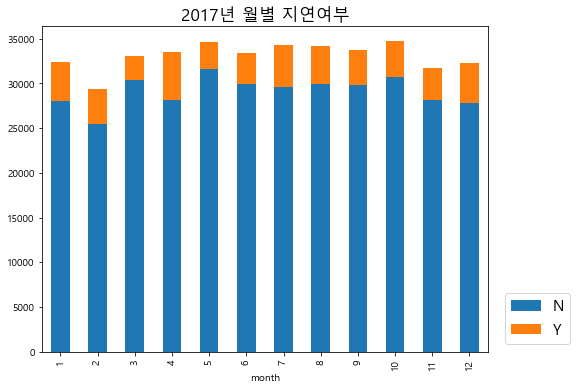

In [14]:
dly_m2017.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('2017년 월별 지연여부', fontsize=17)
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0), fontsize=15)

In [15]:
dly_m2018 = afsnt[afsnt.year==2018].pivot_table(index='month', columns='is_delay', aggfunc='count', values='is_arrive')
dly_m2018

is_delay,N,Y
month,,
1,26546,5522
2,24298,5149
3,29752,3042
4,28061,4815
5,29119,5477
6,28951,4531
7,30865,3308
8,29474,4985
9,29664,3869


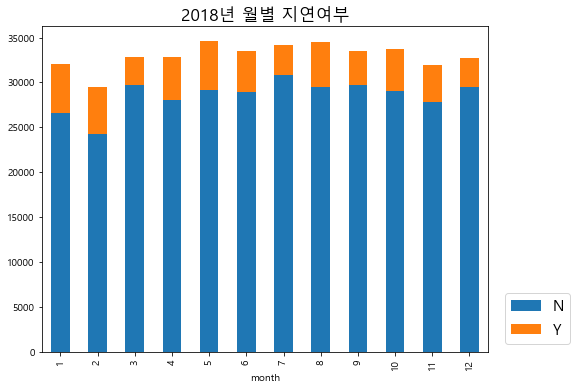

In [16]:
dly_m2018.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('2018년 월별 지연여부', fontsize=17)
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0), fontsize=15)

In [33]:
dly_m2019 = afsnt[afsnt.year==2019].pivot_table(index='month', columns='is_delay', aggfunc='count', values='is_arrive')
dly_m2019

is_delay,N,Y
month,,
1,29331,3056
2,26089,3373
3,29774,2716
4,29296,3139
5,31168,3044
6,30188,3098


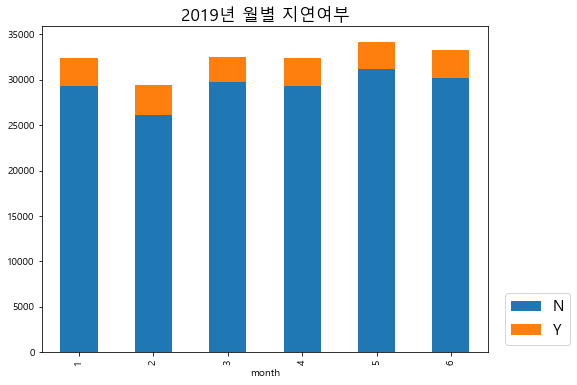

In [58]:
dly_m2019.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('2019년 월별 지연여부', fontsize=17)
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0), fontsize=15)

## 지연사유 plotting
- A/C접속이 지연사유의 **약 90%** -> 압도적으로 높아서 plotting 했을 때 다른 지연사유 빈도 확인 어려움.
- **편의를 위해** A/C접속을 제외하고 plotting 할 것이지만 A/C접속이 가장 큰 지연사유라는 것 잊지말기!

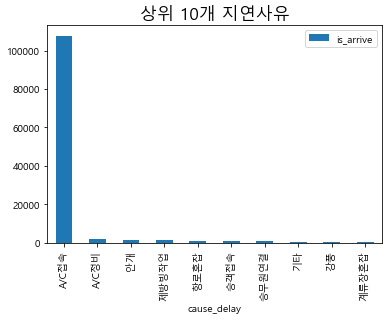

In [50]:
# 지연사유 상위 10개
afsnt.pivot_table(index='cause_delay', aggfunc='count', values='is_arrive').\
                    sort_values(by='is_arrive', ascending=False)[:10].plot(kind='bar')
plt.title('상위 10개 지연사유', fontsize=17)

### 월별

In [52]:
# 월별 지연사유
mm_drr = afsnt.pivot_table(index='cause_delay', columns='month', aggfunc='count', 
                   values='is_arrive')
mm_drr

month,1,2,3,4,5,6,7,8,9,10,11,12
cause_delay,,,,,,,,,,,,
A/C접속,11523.0,10844.0,7599.0,12292.0,10720.0,10247.0,7233.0,8540.0,7067.0,8016.0,6903.0,6754.0
A/C정비,173.0,200.0,184.0,194.0,156.0,237.0,180.0,195.0,134.0,113.0,119.0,146.0
Curfew,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKD변경,7.0,4.0,6.0,14.0,9.0,3.0,2.0,7.0,1.0,5.0,5.0,4.0
강설,155.0,178.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.0
강우,NaN,NaN,NaN,NaN,3.0,5.0,10.0,15.0,NaN,NaN,NaN,NaN
강풍,8.0,140.0,75.0,143.0,88.0,43.0,25.0,18.0,2.0,35.0,18.0,1.0
계류장혼잡,21.0,12.0,23.0,46.0,40.0,30.0,23.0,60.0,65.0,52.0,25.0,20.0
공항폐쇄,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### 계절별 지연사유 plotting
- A/C접속 제외한 상위 7개의 지연사유

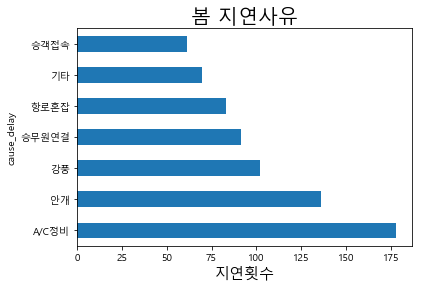

In [101]:
# 3, 4, 5월: 봄
((mm_drr[3]+mm_drr[4]+mm_drr[5])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('봄 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

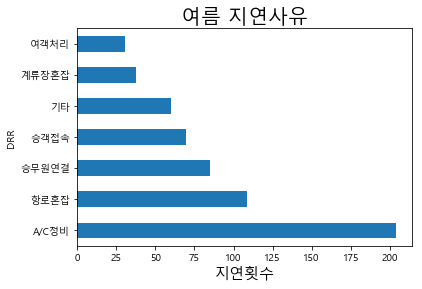

In [26]:
# 6, 7, 8월: 여름
((mm_drr[6]+mm_drr[7]+mm_drr[8])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('여름 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

- > 여름은 기상으로 인한 지연율이 생각보다 그리 크지 않음.

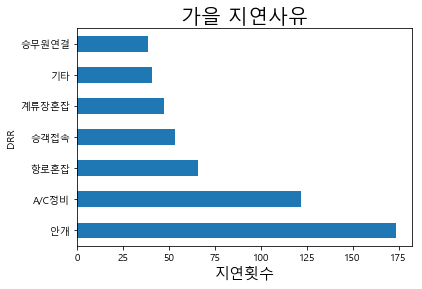

In [27]:
# 9, 10, 11: 가을
((mm_drr[9]+mm_drr[10]+mm_drr[11])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('가을 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

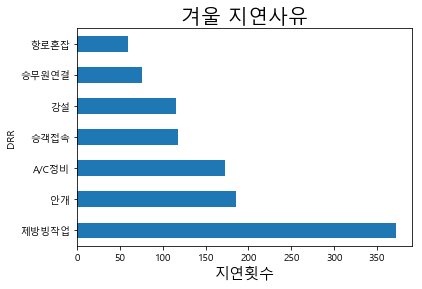

In [28]:
# 12, 1, 2: 겨울
((mm_drr[12]+mm_drr[1]+mm_drr[2])/3).sort_values(ascending=False)[1:8].plot(kind='barh')
plt.title('겨울 지연사유', fontsize=20)
plt.xlabel('지연횟수', fontsize=15)

### 지연사유별로 지연시간 얼마나?

In [68]:
afsnt.pivot_table(index='cause_delay', aggfunc='mean', values='delay')

,delay
cause_delay,
A/C접속,52.149669
A/C정비,80.269818
Curfew,55.666667
SKD변경,99.522388
강설,106.180055
강우,57.666667
강풍,70.520134
계류장혼잡,40.086331
공항폐쇄,77.333333


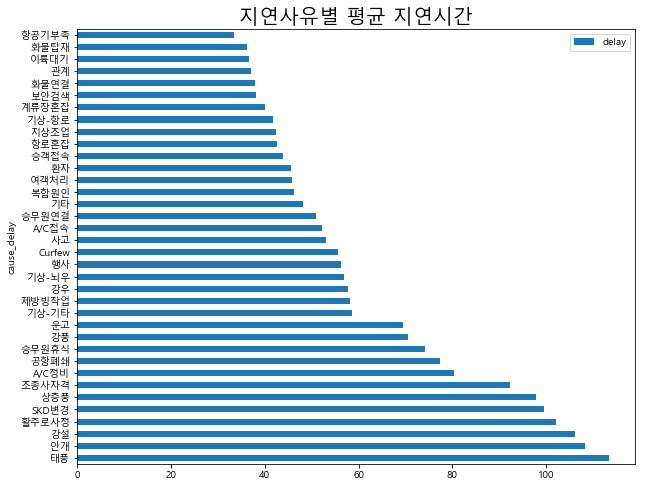

In [76]:
afsnt.pivot_table(index='cause_delay', aggfunc='mean', values='delay').\
    sort_values(by='delay', ascending=False).plot(kind='barh',
                                                  figsize=(10, 8))
plt.title('지연사유별 평균 지연시간', fontsize=20)

#### Curfew? -> 야간운항통제시간
- 우리나라는 김포, 대구, 김해 3개 공항에만 적용 됨.
- 김포, 김해: 23:00~06:00 에는 이착륙 불가
- 대구: 00:00~05:00 에는 이착륙 불가
- 예를 들어 항공기의 연결 지연 및 결함 등으로 인하여 제주공항에서 늦게 출발한 경우, 운항 도중 11시가 되는 순간 김포공항에 착륙하지 못하기 때문에 커퓨타임이 존재하지 않는 인천공항으로 회항.(인천, 양양, 무안은 커퓨타임 없음)

In [70]:
# ?????????????????????????
afsnt[afsnt.cause_delay=='Curfew']

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
573260,2018,4,12,목,ARP13,ARP3,F,F1301,SEw4MDI4,D,...,10:55,11:30,Y,Curfew,N,NaN,2018-04-12,2018-04-12 10:55:00,2018-04-12 11:30:00,35
669968,2018,1,10,수,ARP3,ARP15,H,H1134,SEw4MzAx,D,...,21:20,22:19,Y,Curfew,N,NaN,2018-01-10,2018-01-10 21:20:00,2018-01-10 22:19:00,59
938216,2019,3,27,수,ARP6,ARP3,H,H1134,SEw4MzMx,A,...,22:30,23:43,Y,Curfew,N,NaN,2019-03-27,2019-03-27 22:30:00,2019-03-27 23:43:00,73


## 시간대별

In [33]:
# 현준 시간 범주화 참고
def categorization_time(stt):
    t_list=[]
    for i in range(len(stt)):
        time = int(stt[i].split(':')[0])*60 + int(stt[i].split(':')[1])
        if time >= 300 and time < 480:
            t_list.append('5-8시')
        elif time >=480 and time < 660:
            t_list.append('8-11시')
        elif time >=660 and time < 840:
            t_list.append('11-14시')
        elif time >=840 and time < 1020:
            t_list.append('14-17시')
        elif time >=1020 and time < 1200:
            t_list.append('17-20시')
        elif time >=1200 and time < 1380:
            t_list.append('20-23시')
        elif time >=1380 or time < 300:
            t_list.append('23-5시')
    return t_list

t_list = categorization_time(afsnt.sched_time)

In [34]:
afsnt['sched_cat'] = t_list

In [35]:
afsnt.head(10)

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay,sched_cat
0,2017,1,1,일,ARP3,ARP6,J,J1955,SEw3NzE4,D,...,10:32,N,NaN,N,NaN,2017-01-01,2017-01-01 10:05:00,2017-01-01 10:32:00,27,8-11시
1,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,...,9:31,N,NaN,N,NaN,2017-01-01,2017-01-01 09:30:00,2017-01-01 09:31:00,1,8-11시
2,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,...,13:03,N,NaN,N,NaN,2017-01-01,2017-01-01 12:45:00,2017-01-01 13:03:00,18,11-14시
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,...,14:09,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 13:25:00,2017-01-01 14:09:00,44,11-14시
4,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,...,16:31,N,NaN,N,NaN,2017-01-01,2017-01-01 16:10:00,2017-01-01 16:31:00,21,14-17시
5,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,...,17:21,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 16:45:00,2017-01-01 17:21:00,36,14-17시
6,2017,1,1,일,ARP3,ARP6,J,J1960,SEw3NTk5,A,...,19:43,N,NaN,N,NaN,2017-01-01,2017-01-01 19:30:00,2017-01-01 19:43:00,13,17-20시
7,2017,1,1,일,ARP3,ARP6,J,J1961,SEw3NTk5,D,...,20:52,N,NaN,N,NaN,2017-01-01,2017-01-01 20:35:00,2017-01-01 20:52:00,17,20-23시
8,2017,1,1,일,ARP2,ARP3,J,J1015,SEw3NzA2,A,...,17:03,N,NaN,N,NaN,2017-01-01,2017-01-01 17:05:00,2017-01-01 17:03:00,-2,17-20시
9,2017,1,1,일,ARP1,ARP3,J,J1242,SEw3NzA2,D,...,20:36,N,NaN,N,NaN,2017-01-01,2017-01-01 20:25:00,2017-01-01 20:36:00,11,20-23시


In [36]:
afsnt.pivot_table(index='sched_cat', columns='is_delay', aggfunc='count', values='is_arrive')

is_delay,N,Y
sched_cat,,
11-14시,163072,22338
14-17시,167234,30102
17-20시,179709,31572
20-23시,106465,15180
23-5시,343,28
5-8시,66093,3321
8-11시,185856,16396


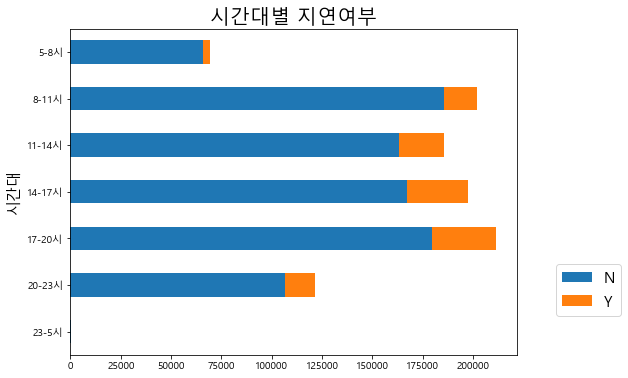

In [37]:
time_dly = afsnt.pivot_table(index='sched_cat', columns='is_delay', aggfunc='count', values='is_arrive')
time_dly = time_dly.loc[['23-5시', '20-23시', '17-20시', '14-17시', '11-14시', '8-11시', '5-8시']]
time_dly.plot(kind='barh',
               stacked=True,
               figsize=(8, 6))
plt.title('시간대별 지연여부', fontsize=20)
plt.ylabel('시간대', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.3), fontsize=15)

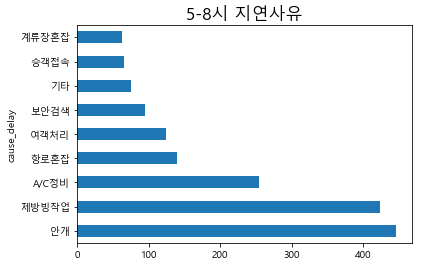

In [38]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['5-8시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('5-8시 지연사유', fontsize=17)

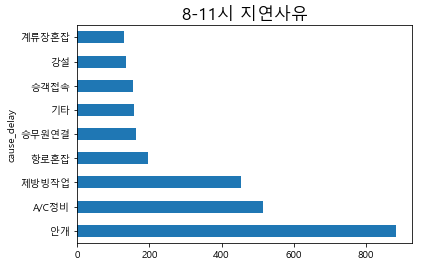

In [95]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['8-11시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('8-11시 지연사유', fontsize=17)

- > 이른 새벽시간에는 안개로 인한 지연이 큼.

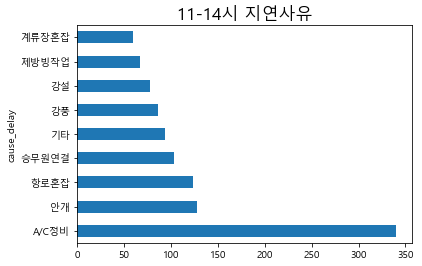

In [96]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['11-14시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('11-14시 지연사유', fontsize=17)

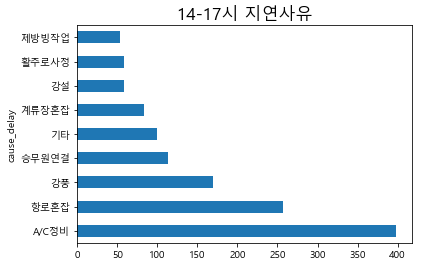

In [97]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['14-17시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('14-17시 지연사유', fontsize=17)

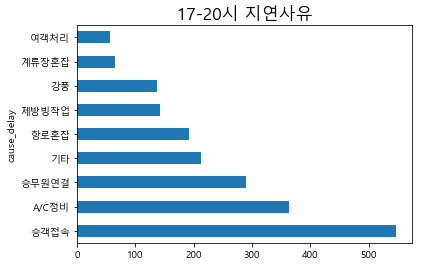

In [39]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['17-20시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('17-20시 지연사유', fontsize=17)

- > 승객접속?????

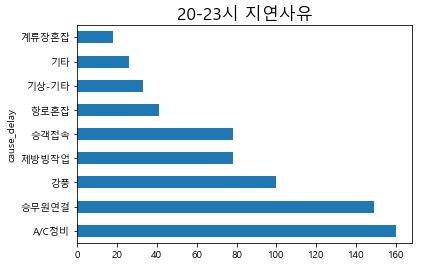

In [99]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['20-23시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('20-23시 지연사유', fontsize=17)

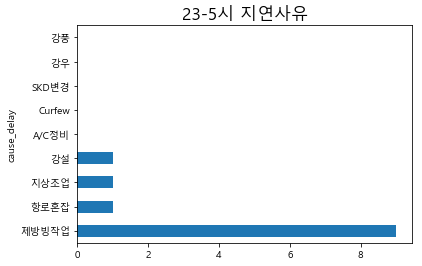

In [100]:
afsnt.pivot_table(index='cause_delay', columns='sched_cat', aggfunc='count', values='is_arrive')['23-5시'].\
    sort_values(ascending=False)[1:10].plot(kind='barh')
plt.title('23-5시 지연사유', fontsize=17)

- > 23-5시는 운항 수 자체가 작으므로 지연 수도 적음. 만약 지연 발생한다해도 **겨울**에나 제방빙작업으로 인한 지연 있을 것.

## 공항별 시각화

In [14]:
# 공항별 총 지연
afsnt.pivot_table(index='origin', columns='is_delay', aggfunc='count', values='is_arrive')

is_delay,N,Y
origin,,
ARP1,278536,32129
ARP10,11,1
ARP11,3539,119
ARP12,4471,409
ARP13,3608,640
ARP14,1783,114
ARP15,11977,1719
ARP2,109432,12081
ARP3,334914,58693


In [16]:
# 공항별 지연(2017년1월)
d201701 = afsnt[(afsnt.year==2017)&(afsnt.month==1)].pivot_table(index='origin', columns='is_delay', aggfunc='count', values='is_arrive')
d201701['count'] = d201701.N+d201701.Y

In [17]:
d201701

is_delay,N,Y,count
origin,,,
ARP1,9199,1361,10560
ARP11,112,12,124
ARP12,141,19,160
ARP13,104,20,124
ARP14,56,6,62
ARP15,355,84,439
ARP2,3614,494,4108
ARP3,10802,1926,12728
ARP4,1042,122,1164


In [15]:
# 출발
dep = afsnt[afsnt.is_arrive=='D']
# 도착
arr = afsnt[afsnt.is_arrive=='A']

In [17]:
# 출발지연
dep_delay = dep[dep.is_delay=='Y']
# 도착지연
arr_delay = arr[arr.is_delay=='Y']

In [25]:
dep_delay

,year,month,day,weekday,origin,dest,airline,flight,tailnum,is_arrive,...,sched_time,real_time,is_delay,cause_delay,is_cancel,cause_cancel,date,sched_datetime,real_datetime,delay
3,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,...,13:25,14:09,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 13:25:00,2017-01-01 14:09:00,44
5,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,...,16:45,17:21,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 16:45:00,2017-01-01 17:21:00,36
22,2017,1,1,일,ARP8,ARP3,J,J1908,SEw3NzE2,D,...,16:20,16:53,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 16:20:00,2017-01-01 16:53:00,33
42,2017,1,1,일,ARP6,ARP3,J,J1958,SEw3NzE4,D,...,15:10,15:45,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 15:10:00,2017-01-01 15:45:00,35
116,2017,1,1,일,ARP3,ARP1,J,J1235,SEw3NzE2,D,...,17:45,18:35,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 17:45:00,2017-01-01 18:35:00,50
136,2017,1,1,일,ARP3,ARP1,J,J1247,SEw3NzE4,D,...,20:55,21:38,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 20:55:00,2017-01-01 21:38:00,43
150,2017,1,1,일,ARP3,ARP1,J,J1237,SEw3NTY5,D,...,18:40,19:13,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 18:40:00,2017-01-01 19:13:00,33
182,2017,1,1,일,ARP3,ARP1,J,J1249,SEw3NzI3,D,...,21:05,21:36,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 21:05:00,2017-01-01 21:36:00,31
219,2017,1,1,일,ARP2,ARP15,J,J1409,SEw3NzA1,D,...,10:30,11:02,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 10:30:00,2017-01-01 11:02:00,32
227,2017,1,1,일,ARP3,ARP8,J,J1909,SEw3NzE2,D,...,15:00,15:32,Y,A/C접속,N,NaN,2017-01-01,2017-01-01 15:00:00,2017-01-01 15:32:00,32


In [30]:
# 출발지연
dep.pivot_table(index='origin', columns='is_delay', aggfunc='count', values='is_arrive')

is_delay,N,Y
origin,,
ARP1,132752,22518
ARP10,5,1
ARP11,1753,77
ARP12,2144,298
ARP13,1635,491
ARP14,874,75
ARP15,5151,1565
ARP2,52867,7834
ARP3,152484,44414
